# Modeling

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3

In [18]:
df.head()

,Uy_narxi,Uy_maydoni,Тип жилья:,Xonalar_soni,Qavati,Uy_qavatliligi,Uy_turi,Tuman,Oy_yil,Oy,Kvmetr_narxi,text3,Ta'miri,mebil,komesiya
4,89000.0,52.0,Новостройки,2,2,10,Monolit,Yakkasaroy,11-2023,11,1711.538462,продатся 2х комнатная квартира в жксалярис куш...,Tamirlanmagan,Да,Нет
6,56000.0,50.0,Новостройки,2,2,10,G'isht,Yakkasaroy,11-2023,11,1120.000000,звоните по номеру 998992843233или напишите в т...,Tamirlanmagan,Да,Нет
8,149000.0,72.0,Новостройки,2,6,8,G'isht,Yakkasaroy,11-2023,11,2069.444444,новостройка 268яккасарайский район жк parisien...,Tamirlanmagan,Да,Нет
10,260000.0,116.0,Новостройки,4,3,10,G'isht,Mirzo Ulug‘bek,11-2023,11,2241.379310,mирзо улугбекский район улниезбек йули ориенти...,To'liq tamirlangan,Да,Да
12,44900.0,49.0,Новостройки,2,3,18,Monolit,Mirzo Ulug‘bek,11-2023,11,916.326531,мулугbrooklynкоробка2310 4852м2монолитный домк...,Tamirlanmagan,Нет,Нет


In [19]:
# drop columns that Тип жилья: , text3, Kvmetr_narxi
df = df.drop(["Тип жилья:", "text3", "Kvmetr_narxi", "Oy"], axis=1)

In [20]:
df.head()

,Uy_narxi,Uy_maydoni,Xonalar_soni,Qavati,Uy_qavatliligi,Uy_turi,Tuman,Oy_yil,Ta'miri,mebil,komesiya
4,89000.0,52.0,2,2,10,Monolit,Yakkasaroy,11-2023,Tamirlanmagan,Да,Нет
6,56000.0,50.0,2,2,10,G'isht,Yakkasaroy,11-2023,Tamirlanmagan,Да,Нет
8,149000.0,72.0,2,6,8,G'isht,Yakkasaroy,11-2023,Tamirlanmagan,Да,Нет
10,260000.0,116.0,4,3,10,G'isht,Mirzo Ulug‘bek,11-2023,To'liq tamirlangan,Да,Да
12,44900.0,49.0,2,3,18,Monolit,Mirzo Ulug‘bek,11-2023,Tamirlanmagan,Нет,Нет


In [21]:
df['Oy_yil'].unique()

array(['11-2023', '11-2024'], dtype=object)

In [22]:
# filter df with Oy_yili columns elements
df = df[df["Oy_yil"] == "11-2024"]
# drop Oy_yili column
df = df.drop("Oy_yil", axis=1)
df.head()

,Uy_narxi,Uy_maydoni,Xonalar_soni,Qavati,Uy_qavatliligi,Uy_turi,Tuman,Ta'miri,mebil,komesiya
28817,62000.0,60.0,3,2,7,G'isht,Sirg'ali,To'liq tamirlangan,Нет,Нет
28818,62000.0,60.0,3,4,7,G'isht,Sirg'ali,To'liq tamirlangan,Да,Нет
28819,62000.0,60.0,3,4,7,G'isht,Sirg'ali,To'liq tamirlangan,Да,Нет
28820,57000.0,68.0,3,10,16,Monolit,Sirg'ali,To'liq tamirlangan,Да,Нет
28821,71500.0,67.0,3,6,7,G'isht,Sirg'ali,To'liq tamirlangan,Да,Нет


In [23]:
# filter df with 'Xonalar_soni' column's element
df = df[df["Xonalar_soni"] <= 4]

In [24]:
df["Xonalar_soni"].unique()

array([3, 2, 4, 1])

In [25]:
# dummify categorical columns like 0 , 1

# df = pd.get_dummies(df, columns=["Uy_turi","Ta'miri","Tuman"], dtype=int)
# df.head()
# make label incoding columns - "Uy_turi","Ta'miri","Tuman"


from sklearn.preprocessing import LabelEncoder

# Ma'lumotlar
categorical_columns = ["Uy_turi", "Ta'miri", "Tuman",'mebil','komesiya']  # Kategorik ustunlar
label_encoders = {}  # Har bir ustun uchun LabelEncoder ob'ektlarini saqlash

# Har bir kategorik ustunni Label Encoding qilish
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # O'rganish va kodlash
    label_encoders[col] = le  # Encoderni saqlash (agar keyinchalik kerak bo'lsa)

# Natijani ko'rish
df.head()

,Uy_narxi,Uy_maydoni,Xonalar_soni,Qavati,Uy_qavatliligi,Uy_turi,Tuman,Ta'miri,mebil,komesiya
28817,62000.0,60.0,3,2,7,1,6,4,1,1
28818,62000.0,60.0,3,4,7,1,6,4,0,1
28819,62000.0,60.0,3,4,7,1,6,4,0,1
28820,57000.0,68.0,3,10,16,2,6,4,0,1
28821,71500.0,67.0,3,6,7,1,6,4,0,1


In [26]:
# make X_train and X_test with using train test split
from sklearn.model_selection import train_test_split
X = df.drop("Uy_narxi", axis=1)
y = df["Uy_narxi"]

In [27]:
# make random forest model with x and y
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create an instance of the RandomForestRegressor class
rf_model = RandomForestRegressor() # Added parentheses to create an instance
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 270327123.93905944
R-squared: 0.8904554512987677


#Features importance

Uy_maydoni: 0.5632848218731027
Xonalar_soni: 0.024673800465220438
Qavati: 0.06145502522824917
Uy_qavatliligi: 0.11562628002275545
Uy_turi: 0.008765711985988944
Tuman: 0.08924356173023243
Ta'miri: 0.08340153961655192
mebil: 0.04848354602256497
komesiya: 0.005065713055334066


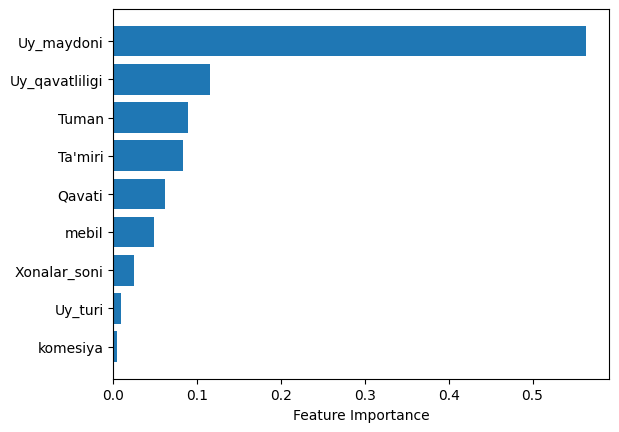

In [ ]:
sort = rf_model.feature_importances_.argsort()

plt.barh(X_train.columns[sort], rf_model.feature_importances_[sort]) # Use X_train.columns instead of df.feature_names

plt.xlabel("Feature Importance")

# view the importance level of columns in numbers
for i, v in enumerate(rf_model.feature_importances_):
    print(f"{X_train.columns[i]}: {v}")